In [1]:
#Librerías básicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Librerías para scrapear 
import requests
from bs4 import BeautifulSoup
from io import StringIO

#ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [2]:
df = pd.read_csv("../raw/salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,Associate,113000,USD,113000,CA,0,CA,M
1,2024,SE,FT,Associate,75000,USD,75000,CA,0,CA,M
2,2024,SE,FT,Research Scientist,208000,USD,208000,US,0,US,M
3,2024,SE,FT,Research Scientist,147000,USD,147000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,214500,USD,214500,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
59994,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
59995,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
59996,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
59997,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           59999 non-null  int64 
 1   experience_level    59999 non-null  object
 2   employment_type     59999 non-null  object
 3   job_title           59999 non-null  object
 4   salary              59999 non-null  int64 
 5   salary_currency     59999 non-null  object
 6   salary_in_usd       59999 non-null  int64 
 7   employee_residence  59999 non-null  object
 8   remote_ratio        59999 non-null  int64 
 9   company_location    59999 non-null  object
 10  company_size        59999 non-null  object
dtypes: int64(4), object(7)
memory usage: 5.0+ MB


In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,59999.000000,5.999900e+04,59999.000000,59999.000000
mean,2023.786763,1.637567e+05,159045.964883,22.177870
std,0.509777,2.017563e+05,72087.101137,41.408523
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.091000e+05,109100.000000,0.000000
50%,2024.000000,1.493000e+05,149000.000000,0.000000
75%,2024.000000,2.000000e+05,200000.000000,0.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


**BORRAMOS REGISTROS DUPLICADOS**

In [5]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,Associate,113000,USD,113000,CA,0,CA,M
1,2024,SE,FT,Associate,75000,USD,75000,CA,0,CA,M
2,2024,SE,FT,Research Scientist,208000,USD,208000,US,0,US,M
3,2024,SE,FT,Research Scientist,147000,USD,147000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,214500,USD,214500,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
28368,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
28369,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
28370,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
28371,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28373 entries, 0 to 28372
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           28373 non-null  int64 
 1   experience_level    28373 non-null  object
 2   employment_type     28373 non-null  object
 3   job_title           28373 non-null  object
 4   salary              28373 non-null  int64 
 5   salary_currency     28373 non-null  object
 6   salary_in_usd       28373 non-null  int64 
 7   employee_residence  28373 non-null  object
 8   remote_ratio        28373 non-null  int64 
 9   company_location    28373 non-null  object
 10  company_size        28373 non-null  object
dtypes: int64(4), object(7)
memory usage: 2.4+ MB


In [7]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,28373.000000,2.837300e+04,28373.000000,28373.000000
mean,2023.728545,1.625334e+05,152403.360448,26.456490
std,0.594255,2.841530e+05,75684.533602,43.841405
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,9.800000e+04,98000.000000,0.000000
50%,2024.000000,1.417000e+05,141000.000000,0.000000
75%,2024.000000,1.941800e+05,192871.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


# TARGET

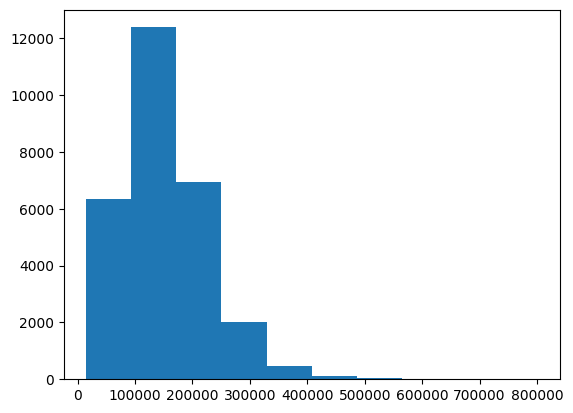

In [8]:
plt.hist(df["salary_in_usd"]);

No es simétrica

<Axes: ylabel='salary_in_usd'>

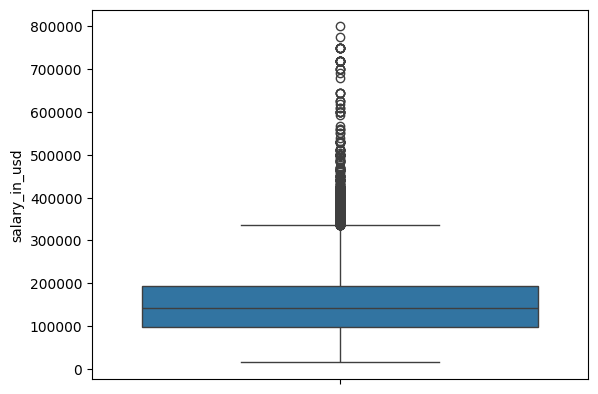

In [9]:
sns.boxplot(df["salary_in_usd"])

# TRANSFORMACIÓN LOGARÍTMICA

Tiene muchísimos outliers

1. Aplicamos transformación logarítmica
2. Quitamos outliers

In [10]:
df["salary_in_usd_log"] = np.log(df['salary_in_usd'])

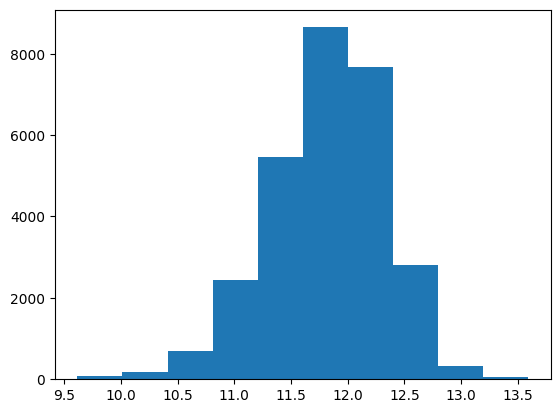

In [11]:
plt.hist(df["salary_in_usd_log"]);

<Axes: ylabel='salary_in_usd_log'>

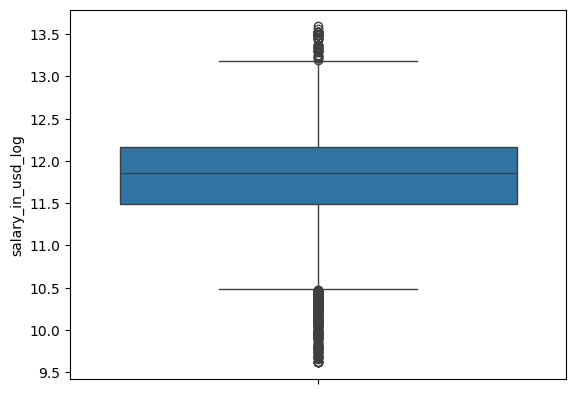

In [12]:
sns.boxplot(df["salary_in_usd_log"])

In [13]:
#Calculamos el rango intercuartílico

q1 = df["salary_in_usd_log"].quantile(0.25) #Primer cuartil
q3 = df["salary_in_usd_log"].quantile(0.75) #Tercer cuartil
iqr = q3-q1 #Rango intercuartílico
lim_inf = q1 - (1.5*iqr) #limite inferior ==> Todo valor que esté por debajo es un outlier
lim_sup = q3 + (1.5*iqr) #limite superior ==> Todo valor que esté por encima es un outlier

outliers = df[(df["salary_in_usd_log"]<lim_inf)|(df["salary_in_usd_log"]>lim_sup)]

print("Primer cuartil (Q1):", q1)
print("Tercer cuartil (Q3):",q3)
print("Rango intercuartílico (IQR):",iqr)
print("Límite inferior (Q1 - 1.5 * IQR):", lim_inf)
print("Límite superior (Q3 + 1.5 * IQR):",lim_sup)
print("Número de outliers:", len(outliers))

Primer cuartil (Q1): 11.49272275765271
Tercer cuartil (Q3): 12.16977685062993
Rango intercuartílico (IQR): 0.6770540929772206
Límite inferior (Q1 - 1.5 * IQR): 10.477141618186877
Límite superior (Q3 + 1.5 * IQR): 13.18535799009576
Número de outliers: 357


In [14]:
#Borramos duplicados
df = df.drop(outliers.index.to_list(), axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28016 entries, 0 to 28372
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           28016 non-null  int64  
 1   experience_level    28016 non-null  object 
 2   employment_type     28016 non-null  object 
 3   job_title           28016 non-null  object 
 4   salary              28016 non-null  int64  
 5   salary_currency     28016 non-null  object 
 6   salary_in_usd       28016 non-null  int64  
 7   employee_residence  28016 non-null  object 
 8   remote_ratio        28016 non-null  int64  
 9   company_location    28016 non-null  object 
 10  company_size        28016 non-null  object 
 11  salary_in_usd_log   28016 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 2.8+ MB


In [15]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio,salary_in_usd_log
count,28016.000000,2.801600e+04,28016.000000,28016.000000,28016.000000
mean,2023.734687,1.601347e+05,152843.237614,26.211808,11.827118
std,0.583090,2.749300e+05,71661.125091,43.752610,0.480065
min,2020.000000,2.850000e+04,35555.000000,0.000000,10.478836
25%,2024.000000,9.944875e+04,99750.000000,0.000000,11.510422
50%,2024.000000,1.421530e+05,142000.000000,0.000000,11.863582
75%,2024.000000,1.940000e+05,193000.000000,100.000000,12.170445
max,2024.000000,3.040000e+07,532000.000000,100.000000,13.184399


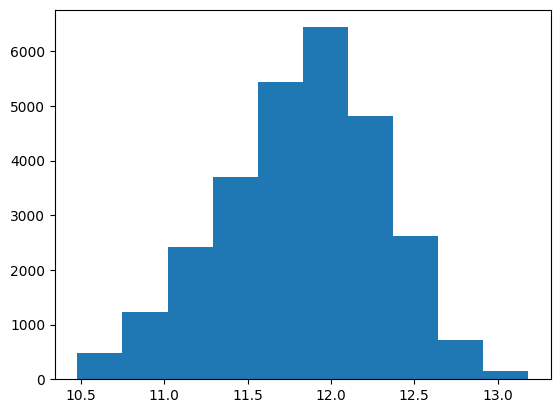

In [16]:
plt.hist(df["salary_in_usd_log"]);

In [17]:
#Utilización de la variable categórica de experience_level
df["exp_level_order"] = df["experience_level"]
df["exp_level_order"].replace({"EN":0,
                               "MI":1,
                               "SE":2,
                               "EX":3}, 
                               inplace=True)

In [18]:
#Tabla de ISO-país-continente
df_iso_location = pd.read_csv("../raw/country_continent_ISO.csv", index_col="Unnamed: 0")
df_iso_location.drop(columns=["Capital", "FIPS", "ISO (3)", "ISO (No)", "Internet", "Note"], inplace = True)
df_iso_location

,Continent,Region,Country,ISO (2)
0,Asia,South Asia,Afghanistan,AF
1,Europe,South East Europe,Albania,AL
2,Africa,Northern Africa,Algeria,DZ
3,Oceania,Pacific,American Samoa,AS
4,Europe,South West Europe,Andorra,AD
...,...,...,...,...
228,Asia,South West Asia,Yemen,YE
229,Africa,Central Africa,Zaire (Dem Rep of Congo),ZR
230,Africa,Southern Africa,Zambia,ZM
231,Africa,Southern Africa,Zimbabwe,ZW


In [19]:
#Merge de tabla de salarios y tabla de ISO-país-continente
df = pd.merge(left=df, right=df_iso_location, how="left", left_on="company_location", right_on="ISO (2)")
df.drop(columns = "ISO (2)", inplace=True)
df.rename(columns={"Continent": "company_continent",
                   "Region": "company_region", 
                   "Country": "company_country"
                   }, inplace=True)

In [20]:
#Utilización de la variable categórica de company_continent
comp_cont_dummies = pd.get_dummies(df["company_continent"], dtype=int, prefix="company_")
df = pd.concat([df, comp_cont_dummies], axis=1)

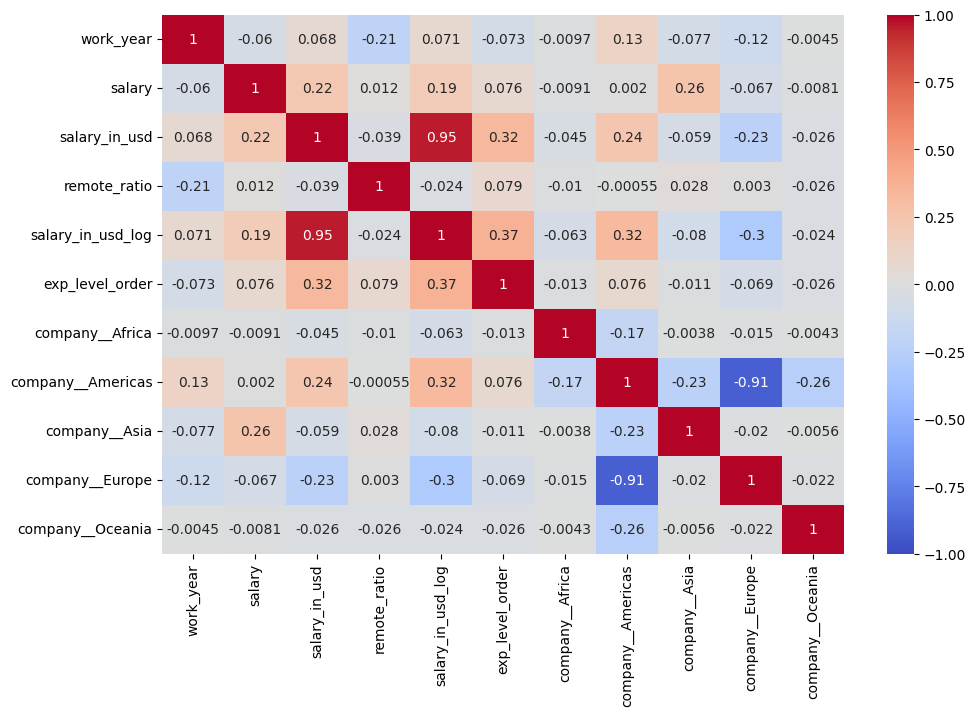

In [21]:
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap="coolwarm"); 

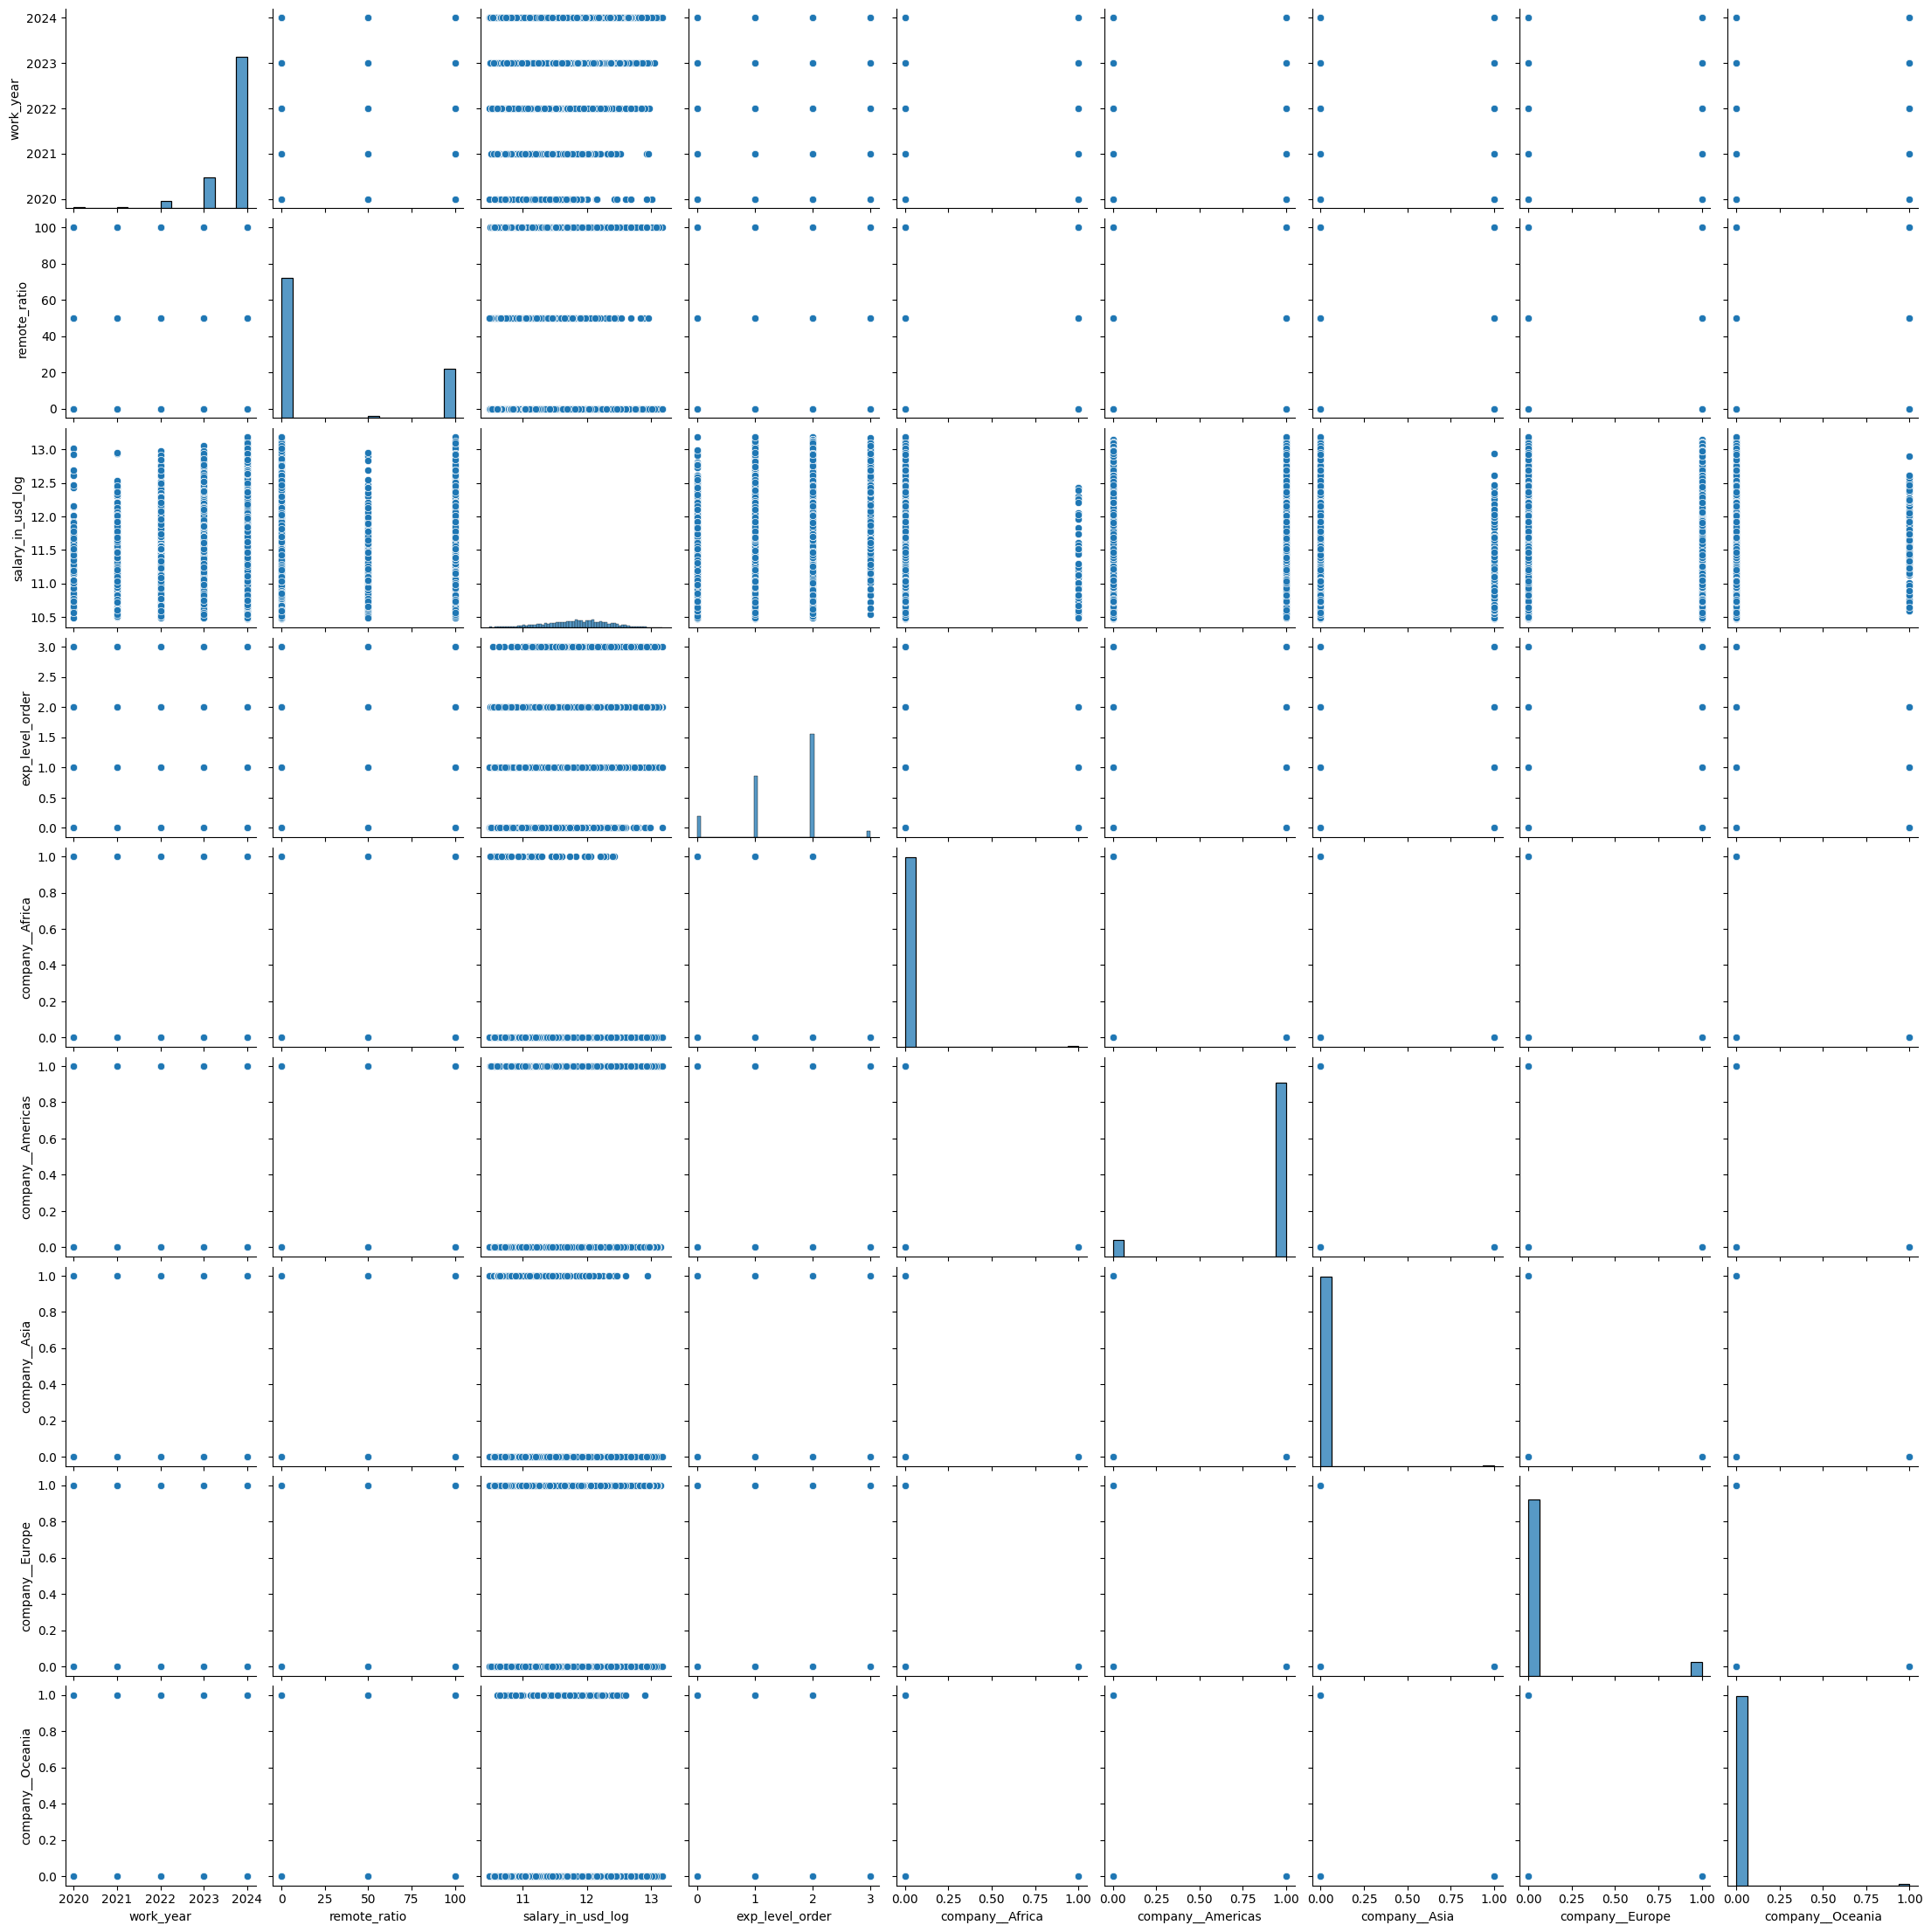

In [22]:
#Borramos variables target análogas
sns.pairplot(df.drop(columns=["salary", "salary_in_usd"]));

In [23]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'salary_in_usd_log',
       'exp_level_order', 'company_continent', 'company_region',
       'company_country', 'company__Africa', 'company__Americas',
       'company__Asia', 'company__Europe', 'company__Oceania'],
      dtype='object')

Pruebo con X = experiencia y América (ahora Europa no porque me he dado cuenta de que tiene mucha correlación con América)

In [24]:
X = df[["exp_level_order", "company__Americas"]]
y = df["salary_in_usd_log"]

Defino conjunto de entrenamiento y de test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

Escalamos

In [28]:
scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

Definimos el modelo baseline (?)

In [27]:
from sklearn.svm import SVR

In [33]:
parameters = {'kernel': ('rbf','poly'), 
              #'C':[1.5, 10, 50, 100]
              }

svr = SVR()

modelo_baseline = GridSearchCV(svr, parameters, cv=5, scoring='neg_mean_absolute_error', verbose=3, n_jobs=-1)

Entrenamos el modelo baseline

In [32]:
modelo_baseline.fit(X_train_scal, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


KeyboardInterrupt: 

In [ ]:
modelo_baseline.fit(X_train_scal, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'kernel': ('rbf', 'poly')},
             scoring='neg_mean_absolute_error', verbose=3)

In [35]:
print(modelo_baseline.best_estimator_)
print(modelo_baseline.best_score_)
print(modelo_baseline.best_params_)

SVR()
-0.34206755897259294
{'kernel': 'rbf'}


Modelo baseline final

In [36]:
modelo_baseline_final = modelo_baseline.best_estimator_
modelo_baseline_final

SVR()

Predicciones

In [40]:
y_train_pred = modelo_baseline_final.predict(X_train_scal)
y_test_pred = modelo_baseline_final.predict(X_test_scal)

In [48]:
pd.DataFrame(y_train_pred)

,0
0,11.993178
1,11.993178
2,11.793302
3,11.187415
4,11.993178
...,...
21007,12.172271
21008,11.993178
21009,11.462040
21010,11.793302


In [47]:
y_train

3821     12.013701
24163    11.950122
27779    11.813030
7403     11.274034
11257    11.877569
           ...    
21575    13.012549
5390     11.685870
860      11.286025
15795    12.087784
23654    12.330942
Name: salary_in_usd_log, Length: 21012, dtype: float64

In [ ]:
#Esto no me encaja
print(metrics.r2_score(y_train_pred, y_train))

-2.0113625415895986


In [ ]:
#Esto no me encaja
print(metrics.r2_score(y_test_pred, y_test))

-1.9826548660286298


In [49]:
pd.concat([pd.DataFrame(y_train_pred), y_train.reset_index(drop=True)], axis=1)

,0,salary_in_usd_log
0,11.993178,12.013701
1,11.993178,11.950122
2,11.793302,11.813030
3,11.187415,11.274034
4,11.993178,11.877569
...,...,...
21007,12.172271,13.012549
21008,11.993178,11.685870
21009,11.462040,11.286025
21010,11.793302,12.087784


In [51]:
pd.concat([pd.DataFrame(y_test_pred), y_test.reset_index(drop=True)], axis=1)

,0,salary_in_usd_log
0,11.793302,11.746415
1,11.793302,11.626254
2,11.793302,11.982929
3,11.993178,11.280741
4,11.793302,11.243738
...,...,...
6999,11.462040,11.695247
7000,11.462040,11.750997
7001,11.993178,11.893073
7002,11.793302,10.963012


Pruebas mías

In [53]:
pd.concat([np.exp(pd.DataFrame(y_train_pred)), np.exp(y_train.reset_index(drop=True))], axis=1)

,0,salary_in_usd_log
0,161648.222186,165000.0
1,161648.222186,154836.0
2,132362.784818,135000.0
3,72215.867606,78750.0
4,161648.222186,144000.0
...,...,...
21007,193352.666505,448000.0
21008,161648.222186,118880.0
21009,95038.763949,79700.0
21010,132362.784818,177688.0


In [54]:
pd.concat([np.exp(pd.DataFrame(y_test_pred)), np.exp(y_test.reset_index(drop=True))], axis=1)

,0,salary_in_usd_log
0,132362.784818,126300.0
1,132362.784818,112000.0
2,132362.784818,160000.0
3,161648.222186,79280.0
4,132362.784818,76400.0
...,...,...
6999,95038.763949,120000.0
7000,95038.763949,126880.0
7001,161648.222186,146250.0
7002,132362.784818,57700.0


Pickle

In [57]:
import pickle
pickle.dump(modelo_baseline_final, open("modelo_baseline_final.pkl", "wb"))
modelo_importado = pickle.load(open("modelo_baseline_final.pkl", "rb"))
modelo_importado
modelo_importado.predict(X_test_scal)

array([11.7933018 , 11.7933018 , 11.7933018 , ..., 11.99317779,
       11.7933018 , 11.99317779])

In [ ]:
#Guardamos el scaler también porque los datos del usuario también deben escalarse
pickle.dump(scaler, open("StandardScaler.pkl", "wb"))

Prueba con los compis :)

Sueldo de un junior empleado de una empresa cuya sede no está en América

In [65]:
prueba = pd.DataFrame({
        'exp_level_order': [0],
        'company__Americas': [0]
    })
prueba

,exp_level_order,company__Americas
0,0,0


In [ ]:
prueba_scal = scaler.transform(prueba)
modelo_baseline_final.predict(prueba_scal)

array([10.92643896])

In [ ]:
np.exp(10.92643896)

55627.833639235345